In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../data/2_cleaned/water_intake_cleaned.csv')
df.describe()


,Unnamed: 0,Age,Weight,Daily Water Intake
count,30000.000000,30000.000000,30000.00000,30000.000000
mean,14999.500000,43.467667,76.84860,2.852444
std,8660.398374,14.998940,18.74494,0.835537
min,0.000000,18.000000,45.00000,1.500000
25%,7499.750000,30.000000,61.00000,2.220000
50%,14999.500000,43.000000,77.00000,2.830000
75%,22499.250000,56.000000,93.00000,3.440000
max,29999.000000,69.000000,109.00000,5.430000


C:\Users\MV_pe\AppData\Local\Temp\ipykernel_22212\3949079759.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df['Age'], df['Weight']],
C:\Users\MV_pe\AppData\Local\Temp\ipykernel_22212\3949079759.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df['Daily Water Intake']],labels=['Daily Water Intake (liters)'])


Text(0, 0.5, 'Valeurs')

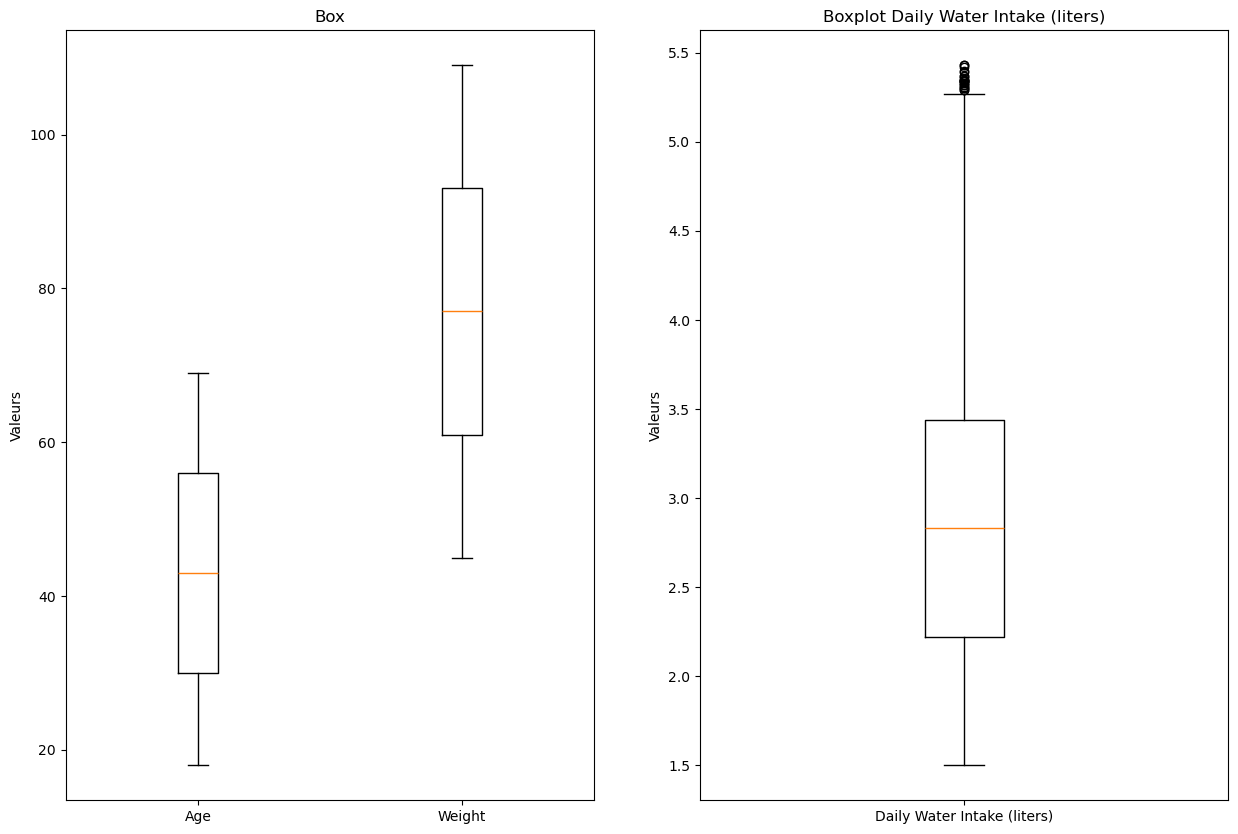

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15, 10))


axes[0].boxplot([df['Age'], df['Weight']], 
                  labels=['Age', 'Weight'])
axes[0].set_title('Box')
axes[0].set_ylabel('Valeurs')

axes[1].boxplot([df['Daily Water Intake']],labels=['Daily Water Intake (liters)'])
axes[1].set_title('Boxplot Daily Water Intake (liters)')
axes[1].set_ylabel('Valeurs')

C:\Users\MV_pe\AppData\Local\Temp\ipykernel_22212\749780986.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grpWeight, x="Weight Group", y="Daily Water Intake", palette=palette_weight, ax=ax)


Text(0, 0.5, 'Valeurs')

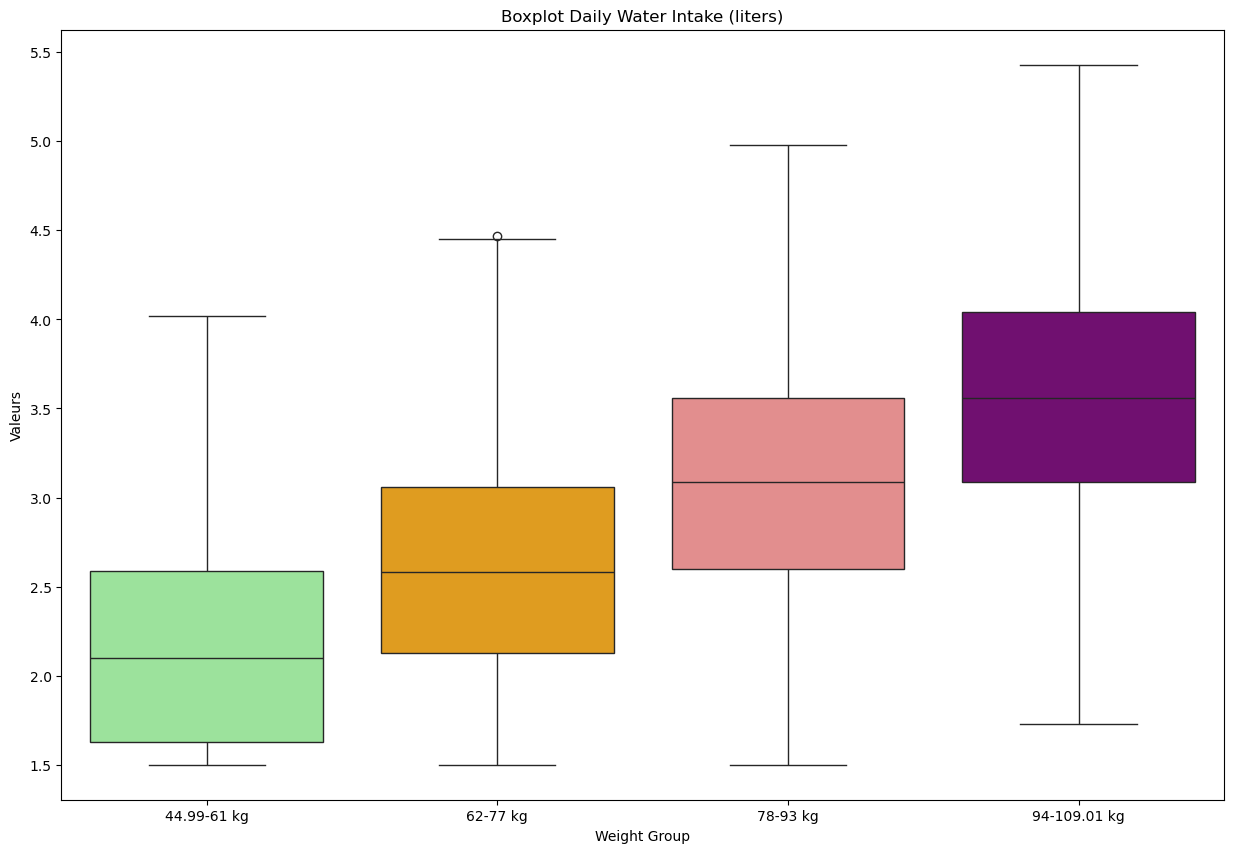

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
bins = [44.99, 61, 77, 93, 109.01]
labels = ['44.99-61 kg', '62-77 kg', '78-93 kg', '94-109.01 kg']
df_grpWeight = df.copy()
df_grpWeight['Weight Group'] = pd.cut(df_grpWeight['Weight'], bins=bins, labels=labels,include_lowest=True)
palette_weight = {
    '44.99-61 kg': 'lightgreen',
    '62-77 kg': 'orange',
    '78-93 kg': 'lightcoral',
    '94-109.01 kg': 'purple'
}





sns.boxplot(data=df_grpWeight, x="Weight Group", y="Daily Water Intake", palette=palette_weight, ax=ax)
ax.set_title('Boxplot Daily Water Intake (liters)')
ax.set_ylabel('Valeurs')


C:\Users\MV_pe\AppData\Local\Temp\ipykernel_22212\2341067449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Gender", y="Daily Water Intake", palette=palette, ax=ax)


Text(0, 0.5, 'Valeurs')

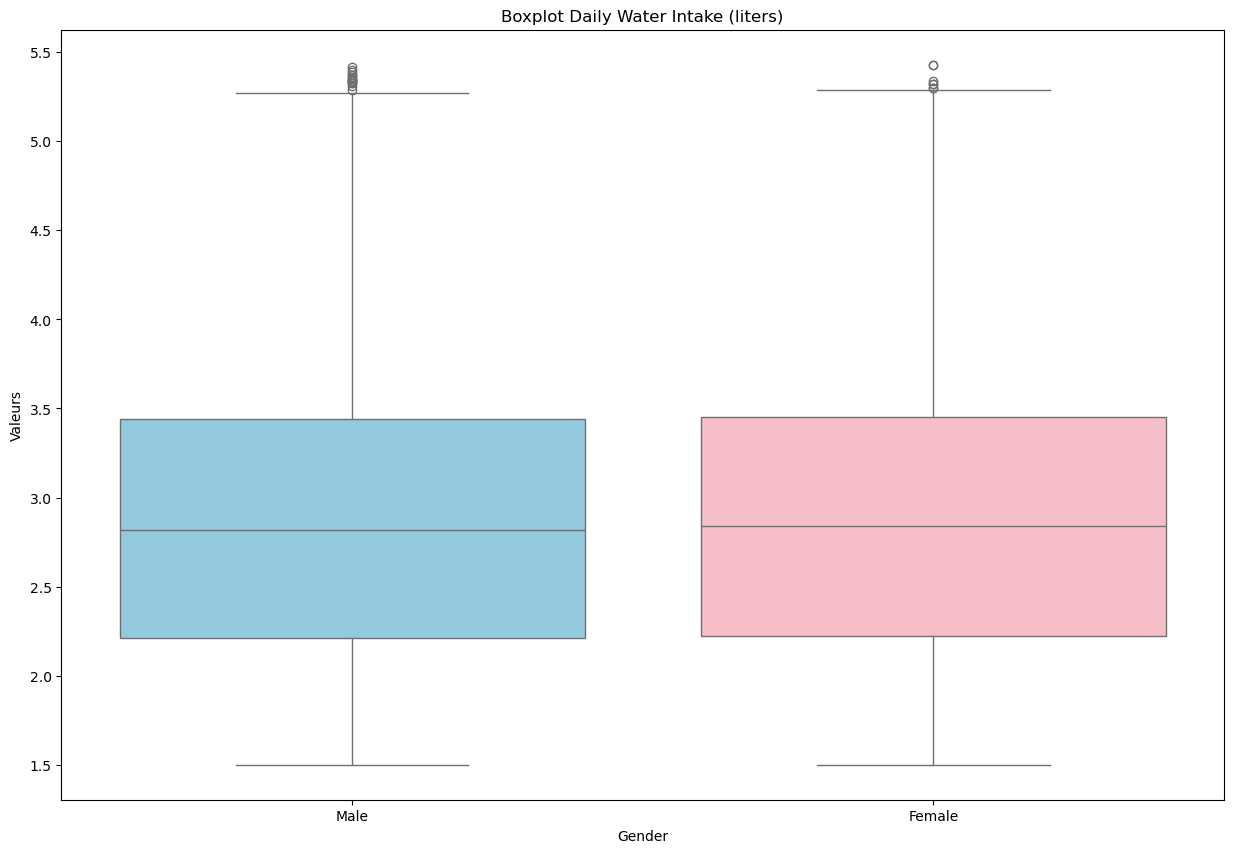

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
palette = {'Male': 'skyblue', 'Female': 'lightpink'}
bins = [44.99, 61, 77, 93, 109.01]



sns.boxplot(data=df, x="Gender", y="Daily Water Intake", palette=palette, ax=ax)
ax.set_title('Boxplot Daily Water Intake (liters)')
ax.set_ylabel('Valeurs')

C:\Users\MV_pe\AppData\Local\Temp\ipykernel_22212\3604390823.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Physical Activity Level")["Daily Water Intake"]


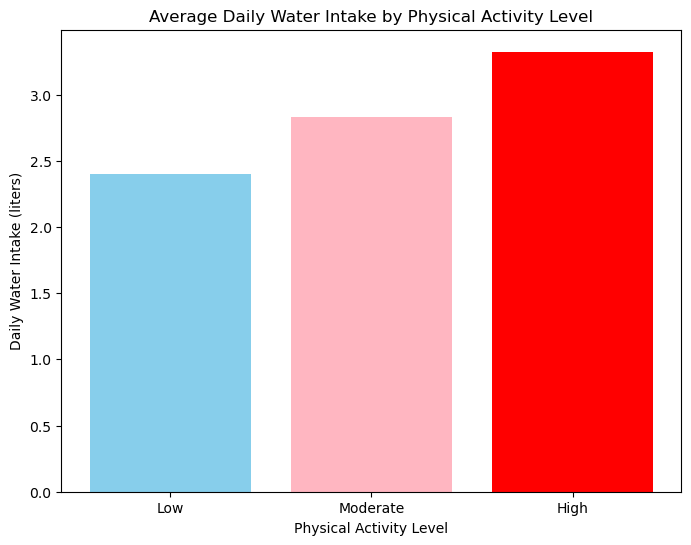

In [18]:
df['Physical Activity Level'] = pd.Categorical(
    df['Physical Activity Level'],
    categories=['Low', 'Moderate', 'High'],
    ordered=True
)

activity_water = (
    df.groupby("Physical Activity Level")["Daily Water Intake"]
      .mean()
)
plt.figure(figsize=(8, 6))

plt.bar(
    activity_water.index,
    activity_water.values,
    color=['skyblue', 'lightpink', 'red']
)

plt.title("Average Daily Water Intake by Physical Activity Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("Daily Water Intake (liters)")
plt.show()


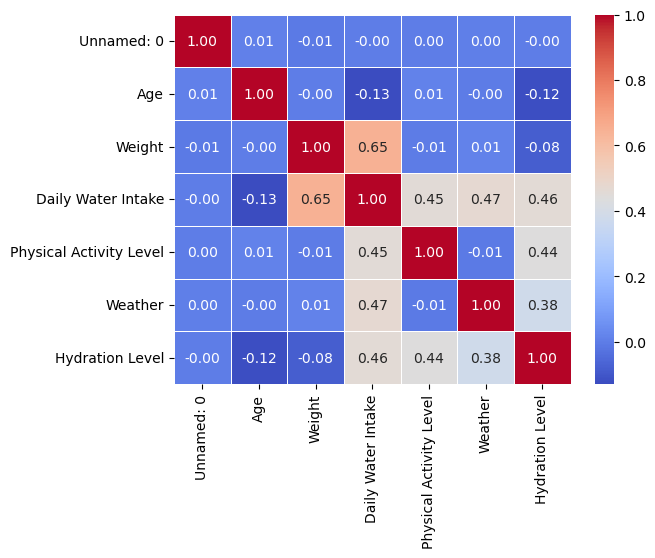

In [19]:
df_encoded = df.copy()
df_encoded = df_encoded.drop(columns=['Gender'])
df_encoded['Physical Activity Level'] = df_encoded['Physical Activity Level'].map({'Low':0,'Moderate':1,'High':2})
df_encoded['Weather'] = df_encoded['Weather'].map({'Cold':0,'Normal':1,'Hot':2})
df_encoded['Hydration Level'] = df_encoded['Hydration Level'].map({'Poor':0,'Good':1})

matrix = df_encoded.corr()

sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()


<Axes: xlabel='Daily Water Intake', ylabel='Count'>

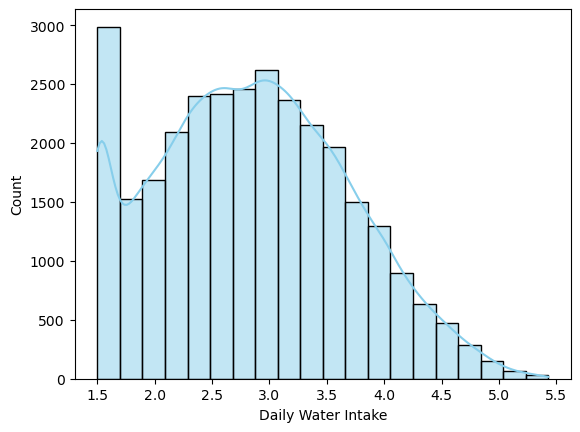

In [20]:
sns.histplot(data=df, x="Daily Water Intake", bins=20, kde=True, color='skyblue')

<Axes: xlabel='Weather', ylabel='Daily Water Intake'>

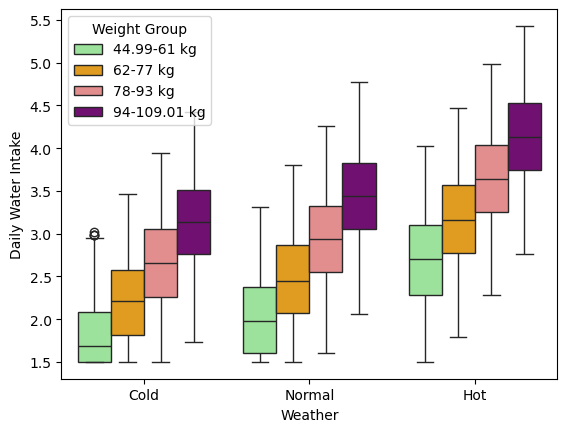

In [21]:
df_grpWeight['Weather'] = pd.Categorical(
    df['Weather'],
    categories=['Cold', 'Normal', 'Hot'],
    ordered=True
)

sns.boxplot(data=df_grpWeight, x="Weather", y="Daily Water Intake", hue="Weight Group", palette=palette_weight)  